# Graph abstraction 
Pijuan-Sala, B., Griffiths, J.A., Guibentif, C., et al.

05 September 2018

In [16]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as pl
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
sc.settings.figdir ='./figures/graph_abstraction/'

#Set working directory
wd = '/path/to/directory/'


results_fileMerged = './write/Embryo10Xv6_genes_PCAbatchCorrected_mergedAGA.h5ad'
results_fileMergedCells = './write/Embryo10Xv6_genes_PCAbatchCorrected_mergedAGA_celltypes.h5ad'


scanpy==1.2.2 anndata==0.6.9 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


## Add metadata new cell types

In [2]:
##======  Read adata object ======##

adata = sc.read(results_fileMerged)

In [3]:
##====== Read metadata file and set index to cell ======##

metadataFilename = wd + 'data/metadata_mergedClustering_Celltypes_20180910.tab'
meta = pd.read_table(metadataFilename,delimiter="\t",header=0)
meta = meta.set_index(meta.index)




In [4]:
##======  Check columns in metadata ======##

meta.columns 


Index(['index', 'sample', 'stage', 'batch', 'theiler', 'doub.density',
       'doublet', 'cluster', 'clustersub', 'clusterstage', 'clustertheiler',
       'stripped', 'clusterIdx', 'clustercat', 'clusterSubUnique', 'tsne1',
       'tsne2', 'clustertsne', 'celltype', 'clusterMergedHierarchy',
       'celltype_new', 'colour_new'],
      dtype='object')

In [5]:
##======  Filter metadata so that the cells correspond to those in the counts matrix ======##


metadata00 = pd.DataFrame(np.array(meta)[np.array([cell in adata.obs_names for cell in meta['index']]),:])
metadata00.columns = meta.columns 

metadata00 = metadata00.set_index(metadata00.index)
metadata00.shape


(116312, 22)

In [6]:
adata.obs.columns

Index(['sample', 'stage', 'batch', 'theiler', 'doub.density', 'doublet',
       'cluster', 'clustersub', 'clusterstage', 'clustertheiler', 'stripped',
       'clusterIdx', 'clustercat', 'clusterSubUnique', 'Umap1', 'Umap2',
       'tsne1', 'tsne2', 'clustertsne', 'celltype', 'clusterMergedHierarchy'],
      dtype='object')

In [7]:

##======  Add metadata to adata ======##

adata.obs['celltype_new'] = list(metadata00.loc[:,'celltype_new'])


In [8]:
##======  Write results ======##

sc.write(results_fileMergedCells,adata)

## Generate colour palettes

In [3]:
##======  Read adata object ======##

adata = sc.read(results_fileMergedCells)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
all_colours_new = {
  "Allantois" : "#532C8A",
  "Anterior Primitive Streak" : "#c19f70",
  "Blood progenitors 1" : "#f9decf",
  "Blood progenitors 2" : "#c9a997",
  "Cardiomyocytes" :  "#B51D8D",#
  "Caudal epiblast" : "#9e6762",
  "Caudal Mesoderm" : "#3F84AA",
  "Def. endoderm" : "#F397C0",#
  "Nascent mesoderm" :  "#C594BF",#                 
  "Mixed mesoderm" :  "#DFCDE4",#
  
  "Endothelium" :  "#eda450",#                              
  "Epiblast" :  "#635547",#
  "Erythroid1" :  "#C72228",#                               
  "Erythroid2" :  "#EF4E22",#   
  "Erythroid3" : "#f77b59",
  "ExE ectoderm" :  "#989898",#                            
  
  "ExE endoderm" : "#7F6874",#                     
  "ExE mesoderm" :  "#8870ad",#
  
  
  "Rostral neurectoderm" :  "#65A83E",#
  "Forebrain/Midbrain/Hindbrain" : "#647a4f",
  
  
  "Gut" :  "#EF5A9D",#[19] "Foregut"                                     
  "Haematoendothelial progenitors" :  "#FBBE92",#            
  "Caudal neurectoderm": "#354E23",
  
  
  "Intermediate mesoderm" :  "#139992",#    
  "Neural crest": "#C3C388",
  
  "NMP" :  "#8EC792",#                                    
  "Notochord" :  "#0F4A9C",#                          
  "Paraxial mesoderm" :  "#8DB5CE",#
  "Parietal endoderm" :  "#1A1A1A",                         
  "PGC" :  "#FACB12",                                       
  
  "Pharyngeal mesoderm" :  "#C9EBFB",#                      
  "Primitive Streak" :  "#DABE99",#
  "Mesenchyme" : "#ed8f84",
  "Somitic mesoderm" :  "#005579",#                                  
  "Spinal cord" :  "#CDE088",#                     
  "Surface ectoderm" : "#BBDCA8",#                          
  
  
  "Visceral endoderm" : "#F6BFCB",#
  "Mes1": "#c4a6b2",#
  "Mes2":"#ca728c",#
  
  "Cardiomyocytes" :  "#B51D8D",
  


}

               

colPalette_new = [all_colours_new[i] for i in sorted(np.unique(adata.obs['celltype_new']))]

In [10]:
##====== Create colour palettes for stages ======##

bluePal = [ "#E3FCFA","#C1ECEF", "#A3D4E3", "#86B8D6","#6C98CA","#5476BE","#3E52B1","#2B2DA5","#2B1999"]

spectralDic = {
    'E6.5':"#D53E4F",
    'E6.75':"#F46D43",
    'E7.0':"#FDAE61",
    'E7.5':"#FFFFBF",
    'E7.25':"#FEE08B",
    'E7.75':"#E6F598",
    'E8.0':"#ABDDA4",
    'E8.5':"#3288BD",
    'E8.25':"#66C2A5",
    'mixed_gastrulation': "#A9A9A9"  
    
}



spectralPal = [ "#D53E4F","#F46D43","#FDAE61","#FFFFBF","#FEE08B","#E6F598","#ABDDA4","#3288BD", "#66C2A5","#A9A9A9"]

In [11]:
##====== Create colour palette for gene expression profiles ======##

from matplotlib.colors import LinearSegmentedColormap
rmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=['lightgrey', 'thistle', 'red', 'darkred'])

cmap = LinearSegmentedColormap.from_list(name='gene_cmap',
                                         colors=["#BFBFBF","#6495ED","#000000"])



## Generate plots to check cell types

In [35]:
sc.settings.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures


In [ ]:
##======  Read adata object ======##

adata = sc.read(results_fileMergedCells)

saving figure to file ./figures/graph_abstraction/umapcelltype.png


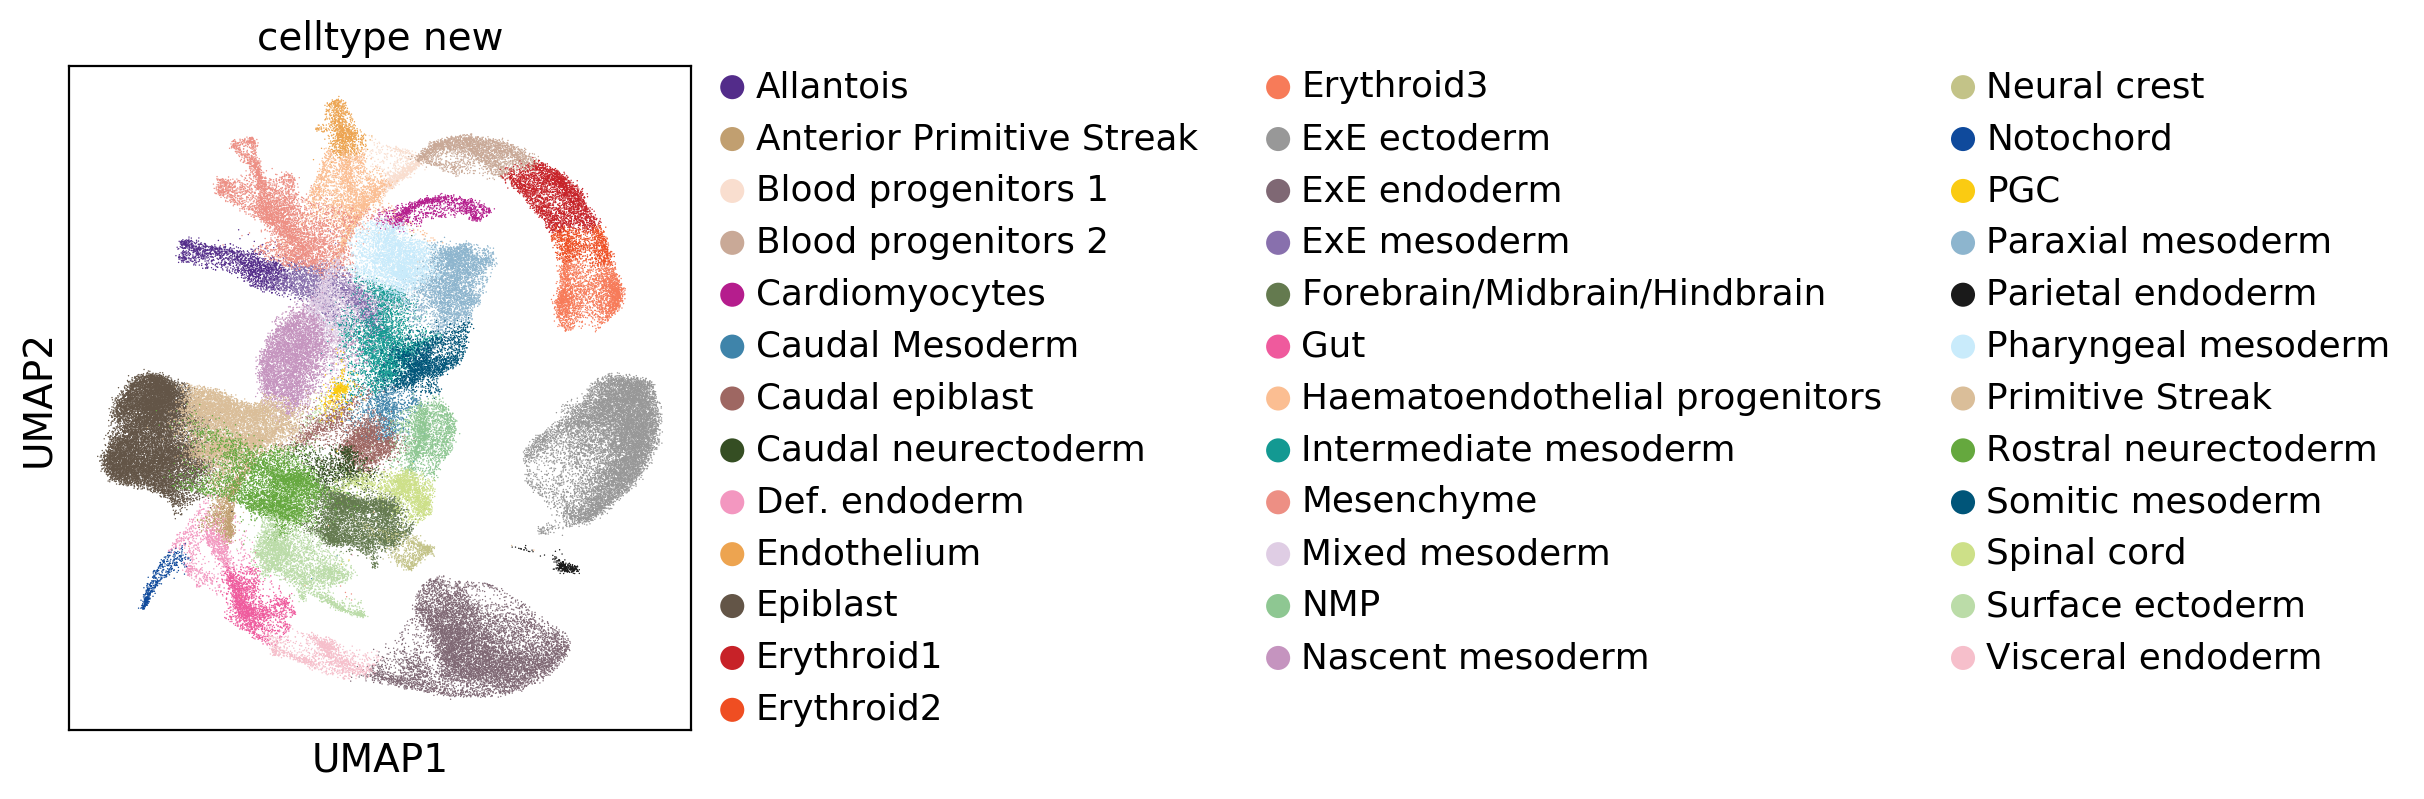

In [37]:
##======  Plot umap coloured by cell types ======##

sc.pl.scatter(adata,color='celltype_new',basis="umap",palette=colPalette_new,save="celltype.png")

saving figure to file ./figures/graph_abstraction/umapumap_timepoint.png


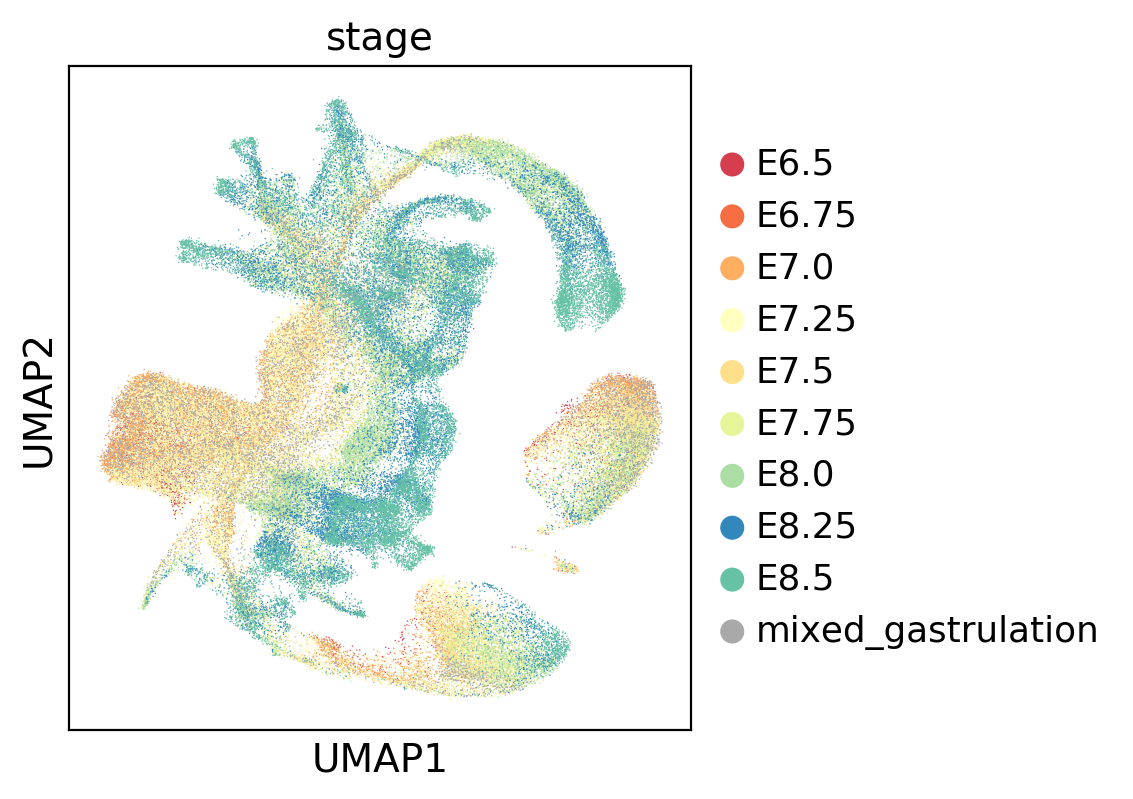

In [18]:
##======  Plot umap coloured by time-points ======##

sc.pl.scatter(adata,color='stage',basis="umap",palette=spectralPal,save="umap_timepoint.png")

## Graph abstraction

In [19]:
##======  Read adata object ======##

adata = sc.read(results_fileMergedCells)

In [20]:
##======  Compute PAGA on merged subclusters ======##


sc.pp.neighbors(adata,n_neighbors=15,use_rep='X_diffmap')
sc.tl.paga(adata, groups='celltype_new')

computing neighbors
    finished (0:01:05.94) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
running partition-based graph abstraction (PAGA)
    finished (0:00:06.02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


In [21]:
##======  Write results ======##

sc.write(results_fileMergedCells,adata)

## Scanpy functions - modifications

In [22]:
import os
import numpy as np
import pandas as pd
import scipy
from pandas.api.types import is_categorical_dtype
import networkx as nx
from matplotlib import pyplot as pl
from matplotlib.colors import is_color_like
from matplotlib import rcParams, ticker
from collections import Iterable


from scanpy import utils
from scanpy import utils as sc_utils
from scanpy import settings
from scanpy import logging as logg
#from scanpy.utils import matrix


def remove_mixgastr(asso_matrix):
    asso_matrix0 = np.delete(asso_matrix, (asso_matrix.shape[1]-1), axis=1)
    for i in range(0,asso_matrix0.shape[0]):
        #print(sum(asso_matrix0[i]))
        asso_matrix0[i] = [num/sum(asso_matrix0[i]) for num in asso_matrix0[i]]
    return(np.array(asso_matrix0))
        #print(sum(asso_matrix0[i]))
        
def remove_groups_mixgatr(asso_groups):
    asso_groups0=[]
    for x in asso_groups:
        #print(x)
        asso_groups0.append(x.replace('\nmixed_gastrulation',''))
    return(asso_groups0)


def paga2(
        adata,
        threshold=None,
        color=None,
        layout=None,
        layout_kwds={},
        init_pos=None,
        root=0,
        labels=None,
        single_component=False,
        solid_edges='connectivities',
        dashed_edges=None,
        transitions=None,
        fontsize=None,
        fontweight='bold',
        text_kwds={},
        node_size_scale=1,
        node_size_power=0.5,
        edge_width_scale=1,
        min_edge_width=None,
        max_edge_width=None,
        arrowsize=30,
        title=None,
        left_margin=0.01,
        random_state=0,
        pos=None,
        cmap=None,
        cax=None,
        colorbar=None,
        cb_kwds={},
        frameon=True,
        add_pos=True,
        export_to_gexf=False,
        use_raw=True,
        colors=None,   # backwards compat
        groups=None,  # backwards compat
        show=None,
        save=None,
        ax=None#,
        #keepMixed='No'
):
    """Plot the abstracted graph through thresholding low-connectivity edges.
    This uses ForceAtlas2 or igraph's layout algorithms for most layouts [Csardi06]_.
    Parameters
    ----------
    adata : :class:`~anndata.AnnData`
        Annotated data matrix.
    threshold : `float` or `None`, optional (default: 0.01)
        Do not draw edges for weights below this threshold. Set to 0 if you want
        all edges. Discarding low-connectivity edges helps in getting a much
        clearer picture of the graph.
    color : gene name or obs. annotation, optional (default: `None`)
        The node colors. Also plots the degree of the abstracted graph when
        passing {'degree_dashed', 'degree_solid'}.
    labels : `None`, `str`, `list`, `dict`, optional (default: `None`)
        The node labels. If `None`, this defaults to the group labels stored in
        the categorical for which :func:`~scanpy.api.tl.paga` has been computed.
    layout : {'fa', 'fr', 'rt', 'rt_circular', 'eq_tree', ...}, optional (default: 'fr')
        Plotting layout. 'fa' stands for ForceAtlas2, 'fr' stands for
        Fruchterman-Reingold, 'rt' stands for Reingold Tilford. 'eq_tree' stands
        for 'eqally spaced tree'. All but 'fa' and 'eq_tree' are igraph
        layouts. All other igraph layouts are also permitted. See also parameter
        `pos` and :func:`~scanpy.api.tl.draw_graph`.
    init_pos : `np.ndarray`, optional (default: `None`)
        Two-column array storing the x and y coordinates for initializing the
        layout.
    random_state : `int` or `None`, optional (default: 0)
        For layouts with random initialization like 'fr', change this to use
        different intial states for the optimization. If `None`, the initial
        state is not reproducible.
    root : `int`, `str` or list of `int`, optional (default: 0)
        If choosing a tree layout, this is the index of the root node or a list
        of root node indices. If this is a non-empty vector then the supplied
        node IDs are used as the roots of the trees (or a single tree if the
        graph is connected). If this is `None` or an empty list, the root
        vertices are automatically calculated based on topological sorting.
    transitions : `str` or `None`, optional (default: `None`)
        Key for `.uns['paga']` that specifies the matrix that - for instance
        `'transistions_confidence'` - that specifies the matrix that stores the
        arrows.
    solid_edges : `str`, optional (default: 'paga_connectivities')
        Key for `.uns['paga']` that specifies the matrix that stores the edges
        to be drawn solid black.
    dashed_edges : `str` or `None`, optional (default: `None`)
        Key for `.uns['paga']` that specifies the matrix that stores the edges
        to be drawn dashed grey. If `None`, no dashed edges are drawn.
    single_component : `bool`, optional (default: `False`)
        Restrict to largest connected component.
    fontsize : `int` (default: `None`)
        Font size for node labels.
    text_kwds : keywords for `matplotlib.text`
        See `here
        <https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text>`_.
    node_size_scale : `float` (default: 1.0)
        Increase or decrease the size of the nodes.
    node_size_power : `float` (default: 0.5)
        The power with which groups sizes influence the radius of the nodes.
    edge_width_scale : `float`, optional (default: 5)
        Edge with scale in units of `rcParams['lines.linewidth']`.
    min_edge_width : `float`, optional (default: `None`)
        Min width of solid edges.
    max_edge_width : `float`, optional (default: `None`)
        Max width of solid and dashed edges.
    arrowsize : `int`, optional (default: 30)
       For directed graphs, choose the size of the arrow head head's length and
       width. See :py:class: `matplotlib.patches.FancyArrowPatch` for attribute
       `mutation_scale` for more info.
    pos : `np.ndarray`, filename of `.gdf` file,  optional (default: `None`)
        Two-column array/list storing the x and y coordinates for drawing.
        Otherwise, path to a `.gdf` file that has been exported from Gephi or
        a similar graph visualization software.
    export_to_gexf : `bool`, optional (default: `None`)
        Export to gexf format to be read by graph visualization programs such as
        Gephi.
    cmap : color map
        The color map.
    cax : `matplotlib.Axes`
        A matplotlib axes object for a potential colorbar.
    cb_kwds : colorbar keywords
        See `here
        <https://matplotlib.org/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase>`__,
        for instance, `ticks`.
    add_pos : `bool`, optional (default: `True`)
        Add the positions to `adata.uns['paga']`.
    title : `str`, optional (default: `None`)
         Provide a title.
    frameon : `bool`, optional (default: `False`)
         Draw a frame around the PAGA graph.
    show : `bool`, optional (default: `None`)
         Show the plot, do not return axis.
    save : `bool` or `str`, optional (default: `None`)
        If `True` or a `str`, save the figure. A string is appended to the
        default filename. Infer the filetype if ending on \{'.pdf', '.png', '.svg'\}.
    ax : `matplotlib.Axes`
         A matplotlib axes object.
    Returns
    -------
    If `show==False`, one or more `matplotlib.Axis` objects.
    Adds `'pos'` to `adata.uns['paga']` if `add_pos` is `True`.
    Notes
    -----
    When initializing the positions, note that - for some reason - igraph
    mirrors coordinates along the x axis... that is, you should increase the
    `maxiter` parameter by 1 if the layout is flipped.
    See also
    --------
    tl.paga
    pl.paga_compare
    pl.paga_path
    """
   # keepMixed=str(keepMixed)
    if groups is not None:  # backwards compat
        labels = groups
        logg.warn('`groups` is deprecated in `pl.paga`: use `labels` instead')
    if colors is None:
        colors = color
    # colors is a list that contains no lists
    groups_key = adata.uns['paga']['groups']
    if ((isinstance(colors, Iterable) and len(colors) == len(adata.obs[groups_key].cat.categories))
        or colors is None or isinstance(colors, str)):
        colors = [colors]

    # labels is a list that contains no lists
    if ((isinstance(labels, Iterable) and len(labels) == len(adata.obs[groups_key].cat.categories))
        or labels is None or isinstance(labels, (str, dict))):
        labels = [labels for i in range(len(colors))]

    if title is None and len(colors) > 1:
        title = [c for c in colors]
    elif isinstance(title, str):
        title = [title for c in colors]
    elif title is None:
        title = [None for c in colors]

    if colorbar is None:
        var_names = adata.var_names if adata.raw is None else adata.raw.var_names
        colorbars = [True if c in var_names else False for c in colors]
    else:
        colorbars = [False for c in colors]

    if ax is None:
        axs, panel_pos, draw_region_width, figure_width = setup_axes(
            panels=colors, colorbars=colorbars)
    else:
        axs = ax

    if len(colors) == 1 and not isinstance(axs, list):
        axs = [axs]

    for icolor, c in enumerate(colors):
        if title[icolor] is not None:
            axs[icolor].set_title(title[icolor])
        pos, sct = _paga_graph2(
            adata,
            axs[icolor],
            layout=layout,
            colors=c,
            layout_kwds=layout_kwds,
            init_pos=init_pos,
            solid_edges=solid_edges,
            dashed_edges=dashed_edges,
            transitions=transitions,
            threshold=threshold,
            root=root,
            labels=labels[icolor],
            fontsize=fontsize,
            fontweight=fontweight,
            text_kwds=text_kwds,
            node_size_scale=node_size_scale,
            node_size_power=node_size_power,
            edge_width_scale=edge_width_scale,
            min_edge_width=min_edge_width,
            max_edge_width=max_edge_width,
            frameon=frameon,
            cmap=cmap,
            cax=cax,
            colorbar=colorbars[icolor],
            cb_kwds=cb_kwds,
            use_raw=use_raw,
            title=title[icolor],
            random_state=random_state,
            export_to_gexf=export_to_gexf,
            single_component=single_component,
            arrowsize=arrowsize,
            pos=pos#,
            #keepMixed=str(keepMixed)
        )
        if colorbars[icolor]:
            bottom = panel_pos[0][0]
            height = panel_pos[1][0] - bottom
            width = 0.006 * draw_region_width / len(colors)
            left = panel_pos[2][2*icolor+1] + 0.2 * width
            rectangle = [left, bottom, width, height]
            fig = pl.gcf()
            ax_cb = fig.add_axes(rectangle)
            cb = pl.colorbar(sct, format=ticker.FuncFormatter(utils.ticks_formatter),
                             cax=ax_cb)
    if add_pos:
        adata.uns['paga']['pos'] = pos
        logg.hint('added \'pos\', the PAGA positions (adata.uns[\'paga\'])')
    savefig_or_show('paga', show=show, save=save)
    if len(colors) == 1 and isinstance(axs, list): axs = axs[0]
    return axs if show == False else None

def _paga_graph2(
        adata,
        ax,
        layout=None,
        layout_kwds={},
        init_pos=None,
        solid_edges=None,
        dashed_edges=None,
        transitions=None,
        threshold=None,
        root=0,
        colors=None,
        labels=None,
        fontsize=None,
        fontweight=None,
        text_kwds=None,
        node_size_scale=1,
        node_size_power=0.5,
        edge_width_scale=1,
        title=None,
        pos=None,
        cmap=None,
        frameon=True,
        min_edge_width=None,
        max_edge_width=None,
        export_to_gexf=False,
        cax=None,
        colorbar=None,
        use_raw=True,
        cb_kwds={},
        single_component=False,
        arrowsize=30,
        random_state=0#,
        #keepMixed=keepMixed
):
    node_labels = labels  # rename for clarity
    if (node_labels is not None
        and isinstance(node_labels, str)
        and node_labels != adata.uns['paga']['groups']):
        raise ValueError('Provide a list of group labels for the PAGA groups {}, not {}.'
                         .format(adata.uns['paga']['groups'], node_labels))
    groups_key = adata.uns['paga']['groups']
    if node_labels is None:
        node_labels = adata.obs[groups_key].cat.categories

    if (colors is None or colors == groups_key) and groups_key is not None:
        if (groups_key + '_colors' not in adata.uns
            or len(adata.obs[groups_key].cat.categories)
               != len(adata.uns[groups_key + '_colors'])):
            add_colors_for_categorical_sample_annotation(adata, groups_key)
        colors = adata.uns[groups_key + '_colors']
        for iname, name in enumerate(adata.obs[groups_key].cat.categories):
            if name in settings.categories_to_ignore: colors[iname] = 'grey'

    if isinstance(root, str):
        if root in node_labels:
            root = list(node_labels).index(root)
        else:
            raise ValueError(
                'If `root` is a string, it needs to be one of {} not \'{}\'.'
                .format(node_labels.tolist(), root))
    if isinstance(root, list) and root[0] in node_labels:
        root = [list(node_labels).index(r) for r in root]

    # define the adjacency matrices
    adjacency_solid = adata.uns['paga'][solid_edges].copy()
    if threshold is None:
        threshold = 0.01  # default threshold
    if threshold > 0:
        adjacency_solid.data[adjacency_solid.data < threshold] = 0
        adjacency_solid.eliminate_zeros()
    nx_g_solid = nx.Graph(adjacency_solid)
    if dashed_edges is not None:
        adjacency_dashed = adata.uns['paga'][dashed_edges].copy()
        if threshold > 0:
            adjacency_dashed.data[adjacency_dashed.data < threshold] = 0
            adjacency_dashed.eliminate_zeros()
        nx_g_dashed = nx.Graph(adjacency_dashed)

    # uniform color
    if isinstance(colors, str) and is_color_like(colors):
        colors = [colors for c in range(len(node_labels))]

    # color degree of the graph
    if isinstance(colors, str) and colors.startswith('degree'):
        # see also tools.paga.paga_degrees
        if colors == 'degree_dashed':
            colors = [d for _, d in nx_g_dashed.degree(weight='weight')]
        elif colors == 'degree_solid':
            colors = [d for _, d in nx_g_solid.degree(weight='weight')]
        else:
            raise ValueError('`degree` either "degree_dashed" or "degree_solid".')
        colors = (np.array(colors) - np.min(colors)) / (np.max(colors) - np.min(colors))

    # plot gene expression
    var_names = adata.var_names if adata.raw is None else adata.raw.var_names
    if isinstance(colors, str) and colors in var_names:
        x_color = []
        cats = adata.obs[groups_key].cat.categories
        for icat, cat in enumerate(cats):
            subset = (cat == adata.obs[groups_key]).values
            if adata.raw is not None and use_raw:
                adata_gene = adata.raw[:, colors]
            else:
                adata_gene = adata[:, colors]
            x_color.append(np.mean(adata_gene.X[subset]))
        colors = x_color

    # plot continuous annotation
    if (isinstance(colors, str) and colors in adata.obs
        and not is_categorical_dtype(adata.obs[colors])):
        x_color = []
        cats = adata.obs[groups_key].cat.categories
        for icat, cat in enumerate(cats):
            subset = (cat == adata.obs[groups_key]).values
            x_color.append(adata.obs.loc[subset, colors].mean())
        colors = x_color

    # plot categorical annotation
    if (isinstance(colors, str) and colors in adata.obs and
        is_categorical_dtype(adata.obs[colors])):
        from scanpy import utils as sc_utils
        
        #asso_groups, asso_matrix = sc.utils.compute_association_matrix_of_groups(adata, 'clustermerged', colors)
        
        #if keepMixed == 'Yes':
          #  asso_names, asso_matrix = sc_utils.compute_association_matrix_of_groups(
           #     adata, prediction=groups_key, reference=colors, normalization='prediction')
            
            
          #  add_colors_for_categorical_sample_annotation(adata, colors)
          #  asso_colors = sc_utils.get_associated_colors_of_groups(
          #      adata.uns[colors + '_colors'], asso_matrix)
        
          #  colors = asso_colors
        
        #else:
            
        asso_names, asso_matrix = sc_utils.compute_association_matrix_of_groups(
            adata, prediction=groups_key, reference=colors, normalization='prediction') 
            
            
            
            
        asso_matrix0 = remove_mixgastr(asso_matrix)


        asso_groups0 = remove_groups_mixgatr(asso_names)
        palRem = adata.uns[colors + '_colors']
        palRem.pop()
        #palRem    
            
        asso_colors = sc.utils.get_associated_colors_of_groups(palRem,asso_matrix0)

        colors = asso_colors
            
        
        
        

    if len(colors) < len(node_labels):
        print(node_labels, colors)
        raise ValueError(
            '`color` list need to be at least as long as `groups`/`node_labels` list.')

    # count number of connected components
    n_components, labels = scipy.sparse.csgraph.connected_components(adjacency_solid)
    if n_components > 1 and not single_component:
        logg.msg(
            'Graph has more than a single connected component. '
            'To restrict to this component, pass `single_component=True`.')
    if n_components > 1 and single_component:
        component_sizes = np.bincount(labels)
        largest_component = np.where(
            component_sizes == component_sizes.max())[0][0]
        adjacency_solid = adjacency_solid.tocsr()[labels == largest_component, :]
        adjacency_solid = adjacency_solid.tocsc()[:, labels == largest_component]
        colors = np.array(colors)[labels == largest_component]
        node_labels = np.array(node_labels)[labels == largest_component]
        logg.info(
            'Restricting graph to largest connected component by dropping categories\n'
            '{}'.format(
                adata.obs[groups_key].cat.categories[labels != largest_component].tolist()))
        nx_g_solid = nx.Graph(adjacency_solid)
        if dashed_edges is not None:
            raise ValueError('`single_component` only if `dashed_edges` is `None`.')

    # node positions from adjacency_solid
    if pos is None:
        if layout is None:
            layout = 'fr'
        if layout == 'fa':
            try:
                from fa2 import ForceAtlas2
            except:
                logg.warn('Package \'fa2\' is not installed, falling back to layout \'fr\'.'
                          'To use the faster and better ForceAtlas2 layout, '
                          'install package \'fa2\' (`pip install fa2`).')
                layout = 'fr'
        if layout == 'fa':
            np.random.seed(random_state)
            if init_pos is None:
                init_coords = np.random.random((adjacency_solid.shape[0], 2))
            else:
                init_coords = init_pos.copy()
            forceatlas2 = ForceAtlas2(
                # Behavior alternatives
                outboundAttractionDistribution=False,  # Dissuade hubs
                linLogMode=False,  # NOT IMPLEMENTED
                adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                edgeWeightInfluence=1.0,
                # Performance
                jitterTolerance=1.0,  # Tolerance
                barnesHutOptimize=True,
                barnesHutTheta=1.2,
                multiThreaded=False,  # NOT IMPLEMENTED
                # Tuning
                scalingRatio=2.0,
                strongGravityMode=False,
                gravity=1.0,
                # Log
                verbose=False)
            if 'maxiter' in layout_kwds:
                iterations = layout_kwds['maxiter']
            elif 'iterations' in layout_kwds:
                iterations = layout_kwds['iterations']
            else:
                iterations = 500
            pos_list = forceatlas2.forceatlas2(
                adjacency_solid, pos=init_coords, iterations=iterations)
            pos = {n: [p[0], -p[1]] for n, p in enumerate(pos_list)}
        elif layout == 'eq_tree':
            nx_g_tree = nx_g_solid
            if solid_edges == 'connectivities':
                adj_tree = adata.uns['paga']['connectivities_tree']
                nx_g_tree = nx.Graph(adj_tree)
            pos = utils.hierarchy_pos(nx_g_tree, root)
            if len(pos) < adjacency_solid.shape[0]:
                raise ValueError('This is a forest and not a single tree. '
                                 'Try another `layout`, e.g., {\'fr\'}.')
        else:
            # igraph layouts
            from scanpy import utils as sc_utils
            g = sc_utils.get_igraph_from_adjacency(adjacency_solid)
            if 'rt' in layout:
                g_tree = g
                if solid_edges == 'connectivities':
                    adj_tree = adata.uns['paga']['connectivities_tree']
                    g_tree = sc_utils.get_igraph_from_adjacency(adj_tree)
                pos_list = g_tree.layout(
                    layout, root=root if isinstance(root, list) else [root]).coords
            elif layout == 'circle':
                pos_list = g.layout(layout).coords
            else:
                # I don't know why this is necessary
                np.random.seed(random_state)
                if init_pos is None:
                    init_coords = np.random.random((adjacency_solid.shape[0], 2)).tolist()
                else:
                    init_pos = init_pos.copy()
                    # this is a super-weird hack that is necessary as igraphs layout function
                    # seems to do some strange stuff, here
                    init_pos[:, 1] *= -1
                    init_coords = init_pos.tolist()
                try:
                    pos_list = g.layout(
                        layout, seed=init_coords,
                        weights='weight', **layout_kwds).coords
                except:  # hack for excepting attribute error for empty graphs...
                    pos_list = g.layout(
                        layout, seed=init_coords,
                        **layout_kwds).coords
            pos = {n: [p[0], -p[1]] for n, p in enumerate(pos_list)}
        pos_array = np.array([pos[n] for count, n in enumerate(nx_g_solid)])
    else:
        if isinstance(pos, str):
            if not pos.endswith('.gdf'):
                raise ValueError('Currently only supporting reading positions from .gdf files.'
                                 'Consider generating them using, for instance, Gephi.')
            s = ''  # read the node definition from the file
            with open(pos) as f:
                f.readline()
                for line in f:
                    if line.startswith('edgedef>'):
                        break
                    s += line
            from io import StringIO
            df = pd.read_csv(StringIO(s), header=-1)
            pos = df[[4, 5]].values
        pos_array = pos
        # convert to dictionary
        pos = {n: [p[0], p[1]] for n, p in enumerate(pos)}

    if len(pos) == 1: pos[0] = (0.5, 0.5)

    # edge widths
    base_edge_width = edge_width_scale * 5 * rcParams['lines.linewidth']

    # draw dashed edges
    if dashed_edges is not None:
        widths = [x[-1]['weight'] for x in nx_g_dashed.edges(data=True)]
        widths = base_edge_width * np.array(widths)
        if max_edge_width is not None:
            widths = np.clip(widths, None, max_edge_width)
        nx.draw_networkx_edges(nx_g_dashed, pos, ax=ax, width=widths, edge_color='grey',
                               style='dashed', alpha=0.5)

    # draw solid edges
    if transitions is None:
        widths = [x[-1]['weight'] for x in nx_g_solid.edges(data=True)]
        widths = base_edge_width * np.array(widths)
        if min_edge_width is not None or max_edge_width is not None:
            widths = np.clip(widths, min_edge_width, max_edge_width)
        nx.draw_networkx_edges(nx_g_solid, pos, ax=ax, width=widths, edge_color='black')
    # draw directed edges
    else:
        adjacency_transitions = adata.uns['paga'][transitions].copy()
        if threshold is None: threshold = 0.005
        adjacency_transitions.data[adjacency_transitions.data < threshold] = 0
        adjacency_transitions.eliminate_zeros()
        g_dir = nx.DiGraph(adjacency_transitions.T)
        widths = [x[-1]['weight'] for x in g_dir.edges(data=True)]
        widths = 100 * base_edge_width * np.array(widths)
        if min_edge_width is not None or max_edge_width is not None:
            widths = np.clip(widths, min_edge_width, max_edge_width)
        nx.draw_networkx_edges(g_dir, pos, ax=ax, width=widths, edge_color='black', arrowsize=arrowsize)

    if export_to_gexf:
        if isinstance(colors[0], tuple):
            from matplotlib.colors import rgb2hex
            colors = [rgb2hex(c) for c in colors]
        for count, n in enumerate(nx_g_solid.nodes()):
            nx_g_solid.node[count]['label'] = str(node_labels[count])
            nx_g_solid.node[count]['color'] = str(colors[count])
            nx_g_solid.node[count]['viz'] = {
                'position': {'x': 1000*pos[count][0],
                             'y': 1000*pos[count][1],
                             'z': 0}}
        filename = settings.writedir + 'paga_graph.gexf'
        logg.msg('exporting to {}'.format(filename), v=1)
        if settings.writedir != '' and not os.path.exists(settings.writedir):
            os.makedirs(settings.writedir)
        nx.write_gexf(nx_g_solid, settings.writedir + 'paga_graph.gexf')

    ax.set_frame_on(frameon)
    ax.set_xticks([])
    ax.set_yticks([])

    # groups sizes
    if (groups_key is not None and groups_key + '_sizes' in adata.uns):
        groups_sizes = adata.uns[groups_key + '_sizes']
    else:
        groups_sizes = np.ones(len(node_labels))
    base_scale_scatter = 2000
    base_pie_size = (base_scale_scatter / (np.sqrt(adjacency_solid.shape[0]) + 10)
                     * node_size_scale)
    median_group_size = np.median(groups_sizes)
    groups_sizes = base_pie_size * np.power(
        groups_sizes / median_group_size, node_size_power)

    # usual scatter plot
    if not isinstance(colors[0], dict):
        sct = ax.scatter(
            pos_array[:, 0], pos_array[:, 1],
            c=colors, edgecolors='face', s=groups_sizes, cmap=cmap)
        if fontsize is None:
            fontsize = rcParams['legend.fontsize']
        for count, group in enumerate(node_labels):
            ax.text(pos_array[count, 0], pos_array[count, 1], group,
                    verticalalignment='center',
                    horizontalalignment='center',
                    size=fontsize, fontweight=fontweight, **text_kwds)
    # else pie chart plot
    else:
        # start with this dummy plot... otherwise strange behavior
        sct = ax.scatter(
            pos_array[:, 0], pos_array[:, 1],
            c='white', edgecolors='face', s=groups_sizes, cmap=cmap)
        trans = ax.transData.transform
        bbox = ax.get_position().get_points()
        ax_x_min = bbox[0, 0]
        ax_x_max = bbox[1, 0]
        ax_y_min = bbox[0, 1]
        ax_y_max = bbox[1, 1]
        ax_len_x = ax_x_max - ax_x_min
        ax_len_y = ax_y_max - ax_y_min
        trans2 = ax.transAxes.inverted().transform
        pie_axs = []
        for count, n in enumerate(nx_g_solid.nodes()):
            pie_size = groups_sizes[count] / base_scale_scatter
            x1, y1 = trans(pos[n])     # data coordinates
            xa, ya = trans2((x1, y1))  # axis coordinates
            xa = ax_x_min + (xa - pie_size/2) * ax_len_x
            ya = ax_y_min + (ya - pie_size/2) * ax_len_y
            # clip, the fruchterman layout sometimes places below figure
            if ya < 0: ya = 0
            if xa < 0: xa = 0
            pie_axs.append(pl.axes([xa, ya, pie_size * ax_len_x, pie_size * ax_len_y], frameon=False))
            pie_axs[count].set_xticks([])
            pie_axs[count].set_yticks([])
            if not isinstance(colors[count], dict):
                raise ValueError('{} is neither a dict of valid matplotlib colors '
                                 'nor a valid matplotlib color.'.format(colors[count]))
            color_single = colors[count].keys()
            fracs = [colors[count][c] for c in color_single]
            if sum(fracs) < 1:
                color_single = list(color_single)
                color_single.append('grey')
                fracs.append(1-sum(fracs))
            pie_axs[count].pie(fracs, colors=color_single)
        if node_labels is not None:
            for ia, a in enumerate(pie_axs):
                a.text(0.5, 0.5, node_labels[ia],
                       verticalalignment='center',
                       horizontalalignment='center',
                       transform=a.transAxes, size=fontsize)
    return pos_array, sct
from matplotlib.figure import SubplotParams as sppars



def setup_axes(
        ax=None,
        panels='blue',
        colorbars=[False],
        right_margin=None,
        left_margin=None,
        projection='2d',
        show_ticks=False):
    """Grid of axes for plotting, legends and colorbars.
    """
    if '3d' in projection: from mpl_toolkits.mplot3d import Axes3D
    avail_projections = {'2d', '3d'}
    if projection not in avail_projections:
        raise ValueError('choose projection from', avail_projections)
    if left_margin is not None:
        raise ValueError('Currently not supporting to pass `left_margin`.')
    if np.any(colorbars) and right_margin is None:
        right_margin = 1 - rcParams['figure.subplot.right'] + 0.21  # 0.25
    elif right_margin is None:
        right_margin = 1 - rcParams['figure.subplot.right'] + 0.06  # 0.10
    # make a list of right margins for each panel
    if not isinstance(right_margin, list):
        right_margin_list = [right_margin for i in range(len(panels))]
    else:
        right_margin_list = right_margin

    # make a figure with len(panels) panels in a row side by side
    top_offset = 1 - rcParams['figure.subplot.top']
    bottom_offset = 0.15 if show_ticks else 0.08
    left_offset = 1 if show_ticks else 0.3  # in units of base_height
    base_height = rcParams['figure.figsize'][1]
    height = base_height
    base_width = rcParams['figure.figsize'][0]
    if show_ticks: base_width *= 1.1

    draw_region_width = base_width - left_offset - top_offset - 0.5  # this is kept constant throughout

    right_margin_factor = sum([1 + right_margin for right_margin in right_margin_list])
    width_without_offsets = right_margin_factor * draw_region_width  # this is the total width that keeps draw_region_width

    right_offset = (len(panels) - 1) * left_offset
    figure_width = width_without_offsets + left_offset + right_offset
    draw_region_width_frac = draw_region_width / figure_width
    left_offset_frac = left_offset / figure_width
    right_offset_frac = 1 - (len(panels) - 1) * left_offset_frac

    if ax is None:
        pl.figure(figsize=(figure_width, height),
                  subplotpars=sppars(left=0, right=1, bottom=bottom_offset))
    left_positions = [left_offset_frac, left_offset_frac + draw_region_width_frac]
    for i in range(1, len(panels)):
        right_margin = right_margin_list[i-1]
        left_positions.append(left_positions[-1] + right_margin * draw_region_width_frac)
        left_positions.append(left_positions[-1] + draw_region_width_frac)
    panel_pos = [[bottom_offset], [1-top_offset], left_positions]

    axs = []
    if ax is None:
        for icolor, color in enumerate(panels):
            left = panel_pos[2][2*icolor]
            bottom = panel_pos[0][0]
            width = draw_region_width / figure_width
            height = panel_pos[1][0] - bottom
            if projection == '2d': ax = pl.axes([left, bottom, width, height])
            elif projection == '3d': ax = pl.axes([left, bottom, width, height], projection='3d')
            axs.append(ax)
    else:
        axs = ax if isinstance(ax, list) else [ax]

    return axs, panel_pos, draw_region_width, figure_width


def add_colors_for_categorical_sample_annotation(
        adata, key, palette=None, force_update_colors=False):
    if key + '_colors' in adata.uns and not force_update_colors:
        if len(adata.obs[key].cat.categories) > len(adata.uns[key + '_colors']):
            logg.info('    number of colors in `.uns[{}\'_colors\']` smaller than number of categories,'
                      ' falling back to palette'.format(key))
        else:
            # make sure that these are valid colors
            adata.uns[key + '_colors'] = [
                additional_colors[c] if c in additional_colors else c
                for c in adata.uns[key + '_colors']]
            return
    else:
        logg.msg('generating colors for {} using palette'.format(key), v=4)
    palette = default_palette(palette)
    palette_adjusted = adjust_palette(palette,
                                      length=len(adata.obs[key].cat.categories))
    adata.uns[key + '_colors'] = palette_adjusted[
        :len(adata.obs[key].cat.categories)].by_key()['color']
    if len(adata.obs[key].cat.categories) > len(adata.uns[key + '_colors']):
        raise ValueError(
            'Cannot plot more than {} categories, which is not enough for {}.'
            .format(len(adata.uns[key + '_colors']), key))
    for iname, name in enumerate(adata.obs[key].cat.categories):
        if name in settings.categories_to_ignore:
            logg.info(
                '    setting color of group \'{}\' in \'{}\' to \'grey\' '
                '(`sc.settings.categories_to_ignore`)'
                .format(name, key))
            adata.uns[key + '_colors'][iname] = 'grey'

additional_colors = {
    'gold2': '#eec900', 'firebrick3': '#cd2626', 'khaki2': '#eee685',
    'slategray3': '#9fb6cd', 'palegreen3': '#7ccd7c', 'tomato2': '#ee5c42',
    'grey80': '#cccccc', 'grey90': '#e5e5e5', 'wheat4': '#8b7e66', 'grey65':
    '#a6a6a6', 'grey10': '#1a1a1a', 'grey20': '#333333', 'grey50': '#7f7f7f',
    'grey30': '#4d4d4d', 'grey40': '#666666', 'antiquewhite2': '#eedfcc',
    'grey77': '#c4c4c4', 'snow4': '#8b8989', 'chartreuse3': '#66cd00',
    'yellow4': '#8b8b00', 'darkolivegreen2': '#bcee68', 'olivedrab3': '#9acd32',
    'azure3': '#c1cdcd', 'violetred': '#d02090', 'mediumpurple3': '#8968cd',
    'purple4': '#551a8b', 'seagreen4': '#2e8b57', 'lightblue3': '#9ac0cd',
    'orchid3': '#b452cd', 'indianred 3': '#cd5555', 'grey60': '#999999',
    'mediumorchid1': '#e066ff', 'plum3': '#cd96cd', 'palevioletred3': '#cd6889',
    'gold2': '#eec900', 'firebrick3': '#cd2626', 'khaki2': '#eee685',
    'slategray3': '#9fb6cd', 'palegreen3': '#7ccd7c', 'tomato2': '#ee5c42',
    'grey80': '#cccccc', 'grey90': '#e5e5e5', 'wheat4': '#8b7e66', 'grey65':
    '#a6a6a6', 'grey10': '#1a1a1a', 'grey20': '#333333', 'grey50': '#7f7f7f',
    'grey30': '#4d4d4d', 'grey40': '#666666', 'antiquewhite2': '#eedfcc',
    'grey77': '#c4c4c4', 'snow4': '#8b8989', 'chartreuse3': '#66cd00',
    'yellow4': '#8b8b00', 'darkolivegreen2': '#bcee68', 'olivedrab3': '#9acd32',
    'azure3': '#c1cdcd', 'violetred': '#d02090', 'mediumpurple3': '#8968cd',
    'purple4': '#551a8b', 'seagreen4': '#2e8b57'}


def savefig_or_show(writekey, show=None, dpi=None, ext=None, save=None):
    if isinstance(save, str):
        # check whether `save` contains a figure extension
        if ext is None:
            for try_ext in ['.svg', '.pdf', '.png']:
                if save.endswith(try_ext):
                    ext = try_ext[1:]
                    save = save.replace(try_ext, '')
                    break
        # append it
        writekey += save
        save = True
    save = settings.autosave if save is None else save
    show = settings.autoshow if show is None else show
    if save: savefig(writekey, dpi=dpi, ext=ext)
    if show: pl.show()
    if save: pl.close()  # clear figure



def savefig(writekey, dpi=None, ext=None):
    """Save current figure to file.
    The `filename` is generated as follows:
        filename = settings.figdir + writekey + settings.plot_suffix + '.' + settings.file_format_figs
    """
    if dpi is None:
        # we need this as in notebooks, the internal figures are also influenced by 'savefig.dpi' this...
        if not isinstance(rcParams['savefig.dpi'], str) and rcParams['savefig.dpi'] < 150:
            if settings._low_resolution_warning:
                logg.warn(
                    'You are using a low resolution (dpi<150) for saving figures.\n'
                    'Consider running `set_figure_params(dpi_save=...)`, which will '
                    'adjust `matplotlib.rcParams[\'savefig.dpi\']`')
                settings._low_resolution_warning = False
        else:
            dpi = rcParams['savefig.dpi']
    if not os.path.exists(settings.figdir): os.makedirs(settings.figdir)
    if settings.figdir[-1] != '/': settings.figdir += '/'
    if ext is None: ext = settings.file_format_figs
    filename = settings.figdir + writekey + settings.plot_suffix + '.' + ext
    # output the following msg at warning level; it's really important for the user
    logg.msg('saving figure to file', filename, v=1)
    pl.savefig(filename, dpi=dpi, bbox_inches='tight')


## Plotting graph abstraction

In [23]:
##======  Read adata object ======##

adata = sc.read(results_fileMergedCells)

In [30]:
colPal = [all_colours_new[str(i)] for i in list(adata.obs['celltype_new'])]
adata.uns['celltype_new_colors'] = spectralPal
cellFollow = np.unique(adata.obs['celltype_new'])

cellPalFollow = [all_colours_new[i] for i in cellFollow]


adata.uns['celltype_new_colors'] = cellPalFollow

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/graph_abstraction/paga_comparetsne_clustersMerged_AGA.png


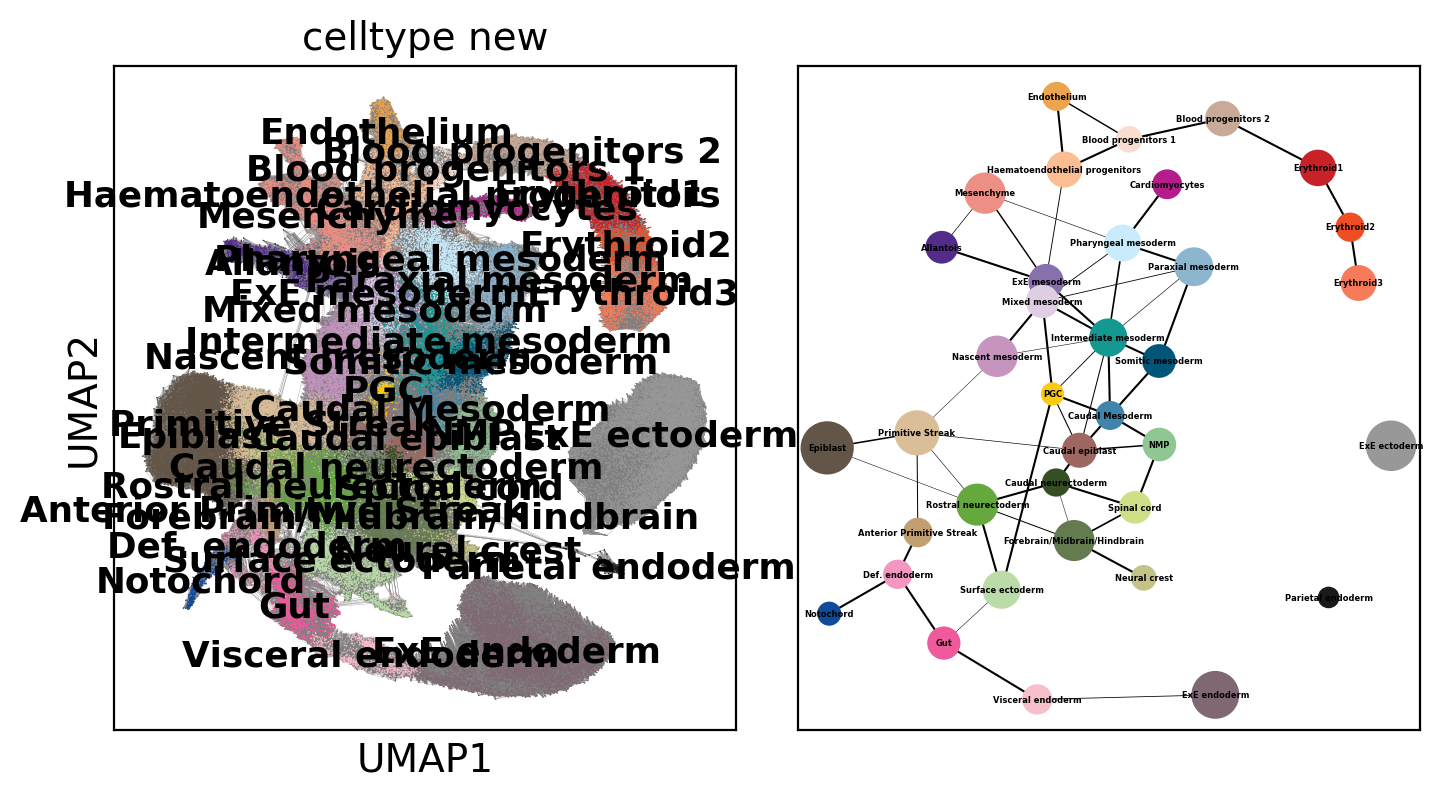

In [31]:
##======  Plot umap and PAGA coloured by merged subclusters ======##

sc.pl.paga_compare(adata, basis='umap',legend_loc='on data',
                   fontsize=3,threshold_solid=0.23,color='celltype_new',
                   edge_width_scale=0.1,save="umap_clustersMerged_AGA.png")

In [32]:
##======  Read graph abstraction coordinates ======##


coords_file = "./figures/graph_abstraction/paga_graph_coords_v6_20180913_mod.gdf"

coords = pd.read_csv(coords_file, sep=",",names=["name_VARCHAR",
                                               
                                                 "label_VARCHAR",
                                                                      'height_DOUBLE',
                                                                      'x_DOUBLE',
                                                                      'y_DOUBLE',
                                                                      'color_VARCHAR1',
                                                                      'col2',
                                                                      'col3','col4'])

coords_sorted = coords


coords_x = [float(i) for i in coords_sorted.loc[:,'x_DOUBLE']]
#print(graph_x)
coords_y = [float(i) for i in coords_sorted.loc[:,'y_DOUBLE']]
#print(graph_y)

coords_matrix = np.array([coords_x, coords_y])
print(coords_matrix.T.shape)
#Add coordinates in to adata file

(37, 2)


exporting to ./write/paga_graph.gexf
--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/graph_abstraction/pagaclustersMergedCelltypes_v2_AGA.svg


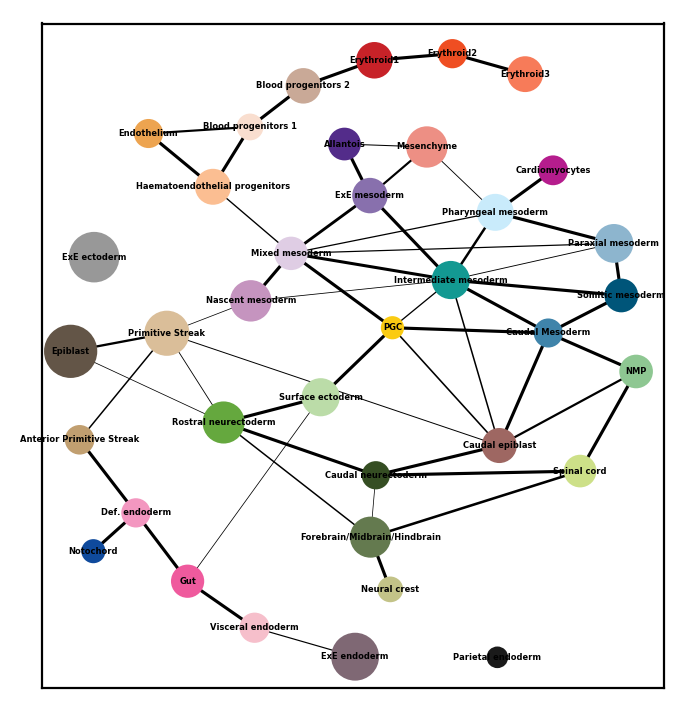

In [36]:
##======  Plot PAGA coloured by celltypes subclusters ======##

sc.pl.paga(adata, threshold_solid=0.23,fontsize=3,edge_width_scale=0.15,node_size_power=0.5,color='celltype_new',
           save="clustersMergedCelltypes_v2_AGA.svg",export_to_gexf=True,pos=coords_matrix.T)

--> added 'pos', the PAGA positions (adata.uns['paga'])
saving figure to file ./figures/graph_abstraction/pagaclustersMergedCelltypes_v2_stage_AGA.svg


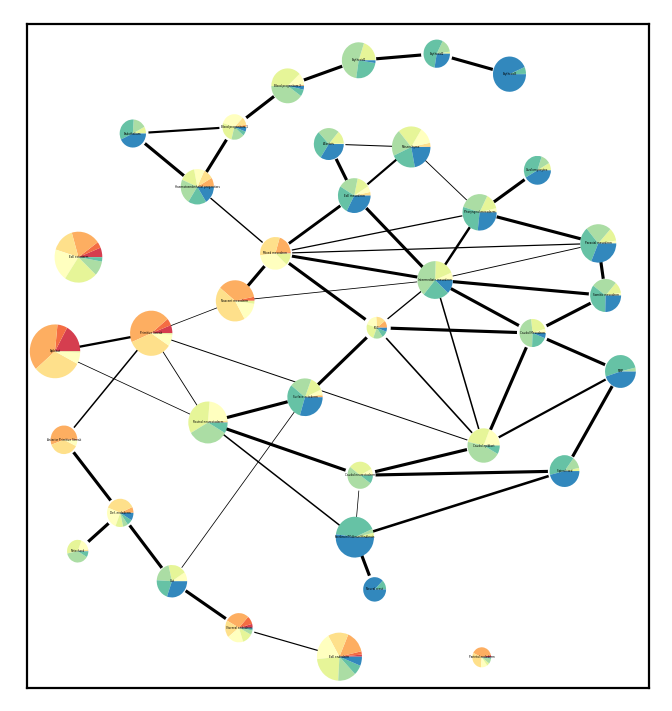

In [34]:
##======  Plot PAGA coloured by stages ======##

colStage = [spectralDic[str(i)] for i in list(adata.obs['stage'])]
adata.uns['stage_colors'] = spectralPal
stageFollow = np.unique(adata.obs['stage'])

spectralPalFollow = [spectralDic[i] for i in stageFollow]


adata.uns['stage_colors'] = spectralPalFollow
paga2(adata,
           threshold=0.23,color='stage',fontsize=1,edge_width_scale=0.15,node_size_power=0.25,
           save="clustersMergedCelltypes_v2_stage_AGA.svg",pos=coords_matrix.T
          )